In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
from mplsoccer import Pitch
from scipy.ndimage import gaussian_filter

In [49]:
with open('open-data/data/events/2302764.json') as f:
    data = json.load(f)
    df = pd.json_normalize(data, sep="_")

In [50]:
first_half = df.loc[:1808]
second_half = df.loc[1809:3551]

# First Half
## AC Milan

In [51]:
pressure = first_half[df.type_name == 'Pressure']
pressure = pressure[['team_name', 'player_name', 'location']]
pressure = pressure[pressure.team_name == 'AC Milan']

pressure['x'] = pressure.location.apply(lambda x: x[0])
pressure['y'] = pressure.location.apply(lambda x: x[1])
pressure = pressure.drop('location', axis=1)

pressure.head()

,team_name,player_name,x,y
60,AC Milan,Andrea Pirlo,40.2,7.0
64,AC Milan,Ivan Gennaro Gattuso,37.1,11.1
70,AC Milan,Paolo Maldini,5.5,4.3
81,AC Milan,Andrea Pirlo,21.2,17.7
97,AC Milan,Andrea Pirlo,32.4,14.9


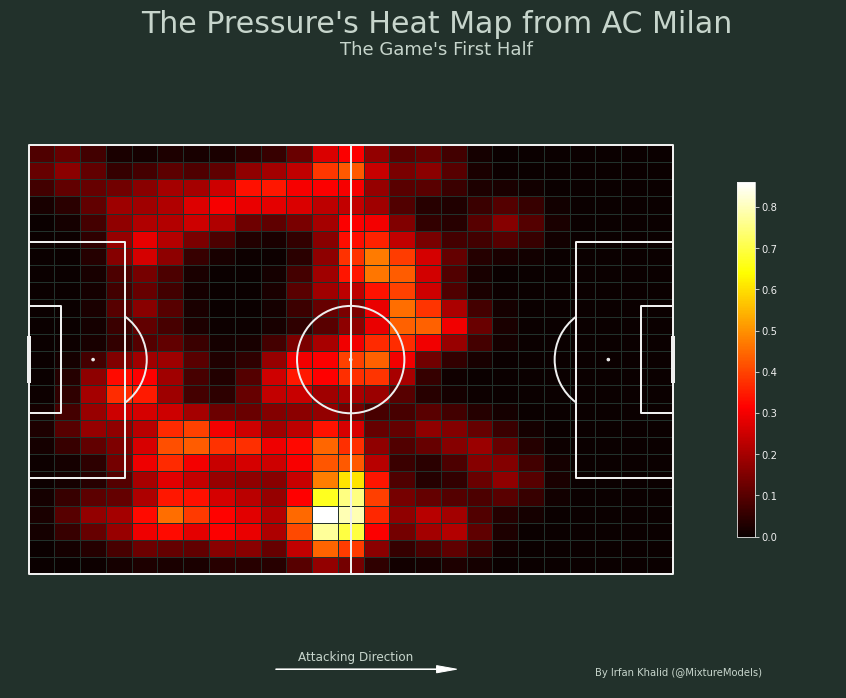

In [52]:
pitch = Pitch(pitch_type='statsbomb', line_zorder=2, 
              pitch_color='#22312b', line_color='#efefef')
fig, axs = pitch.grid(figheight=10, title_height=0.08, endnote_space=0, axis=False,
                    title_space=0, grid_height=0.82, endnote_height=0.05)
fig.set_facecolor('#22312b')

bin_statistic = pitch.bin_statistic(pressure.x, pressure.y, 
                                    statistic='count', bins=(25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)

pcm = pitch.heatmap(bin_statistic, ax=axs['pitch'], cmap='hot', edgecolors='#22312b')

cbar = fig.colorbar(pcm, ax=axs['pitch'], shrink=0.6)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')

axs['endnote'].text(0.8, 0.5, 'By Irfan Khalid (@MixtureModels)', color='#c7d5cc',
                   va='center', ha='center', fontsize=10)

axs['endnote'].text(0.4, 0.95, 'Attacking Direction', va='center', ha='center', color='#c7d5cc', fontsize=12)
axs['endnote'].arrow(0.3, 0.6, 0.2, 0, head_width=0.2, head_length=0.025, ec='w', fc='w')
axs['endnote'].set_xlim(0, 1)
axs['endnote'].set_ylim(0, 1)

axs['title'].text(0.5, 0.7, 'The Pressure\'s Heat Map from AC Milan', color='#c7d5cc',
                   va='center', ha='center', fontsize=30)
axs['title'].text(0.5, 0.25, 'The Game\'s First Half', color='#c7d5cc',
                   va='center', ha='center', fontsize=18)
plt.show()

## Liverpool

In [53]:
pressure = first_half[df.type_name == 'Pressure']
pressure = pressure[['team_name', 'player_name', 'location']]
pressure = pressure[pressure.team_name == 'Liverpool']

pressure['x'] = pressure.location.apply(lambda x: x[0])
pressure['y'] = pressure.location.apply(lambda x: x[1])
pressure = pressure.drop('location', axis=1)

pressure.head()

,team_name,player_name,x,y
24,Liverpool,Sami Hyypiä,48.0,14.0
31,Liverpool,John Arne Semundseth Riise,44.4,14.8
34,Liverpool,Djimi Traoré,21.8,15.7
110,Liverpool,Djimi Traoré,83.9,36.1
147,Liverpool,Djimi Traoré,36.1,13.0


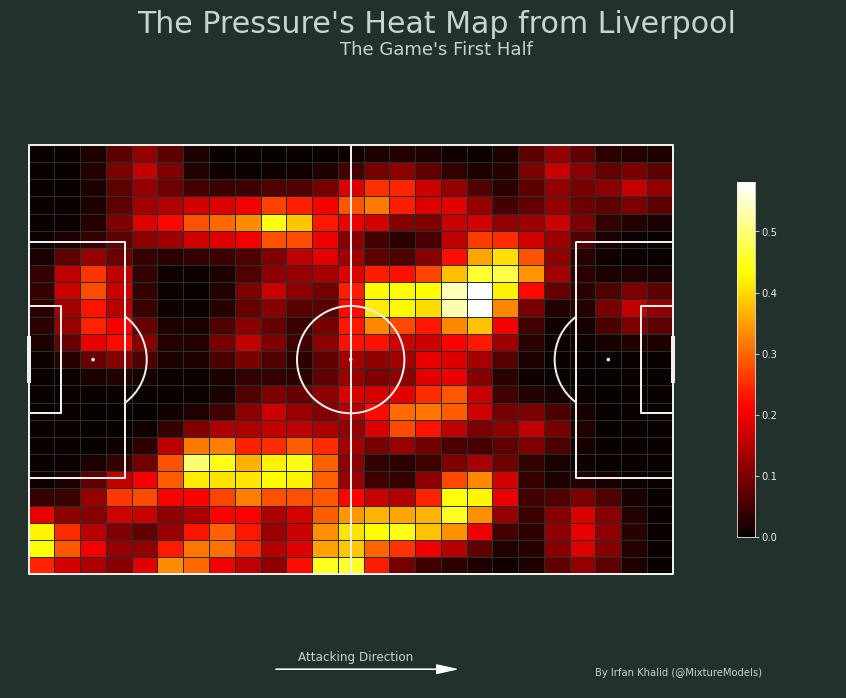

In [54]:
pitch = Pitch(pitch_type='statsbomb', line_zorder=2, 
              pitch_color='#22312b', line_color='#efefef')
fig, axs = pitch.grid(figheight=10, title_height=0.08, endnote_space=0, axis=False,
                    title_space=0, grid_height=0.82, endnote_height=0.05)
fig.set_facecolor('#22312b')

bin_statistic = pitch.bin_statistic(pressure.x, pressure.y, 
                                    statistic='count', bins=(25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)

pcm = pitch.heatmap(bin_statistic, ax=axs['pitch'], cmap='hot', edgecolors='#22312b')

cbar = fig.colorbar(pcm, ax=axs['pitch'], shrink=0.6)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')

axs['endnote'].text(0.8, 0.5, 'By Irfan Khalid (@MixtureModels)', color='#c7d5cc',
                   va='center', ha='center', fontsize=10)

axs['endnote'].text(0.4, 0.95, 'Attacking Direction', va='center', ha='center', color='#c7d5cc', fontsize=12)
axs['endnote'].arrow(0.3, 0.6, 0.2, 0, head_width=0.25, head_length=0.025, ec='w', fc='w')
axs['endnote'].set_xlim(0, 1)
axs['endnote'].set_ylim(0, 1)

axs['title'].text(0.5, 0.7, 'The Pressure\'s Heat Map from Liverpool', color='#c7d5cc',
                   va='center', ha='center', fontsize=30)
axs['title'].text(0.5, 0.25, 'The Game\'s First Half', color='#c7d5cc',
                   va='center', ha='center', fontsize=18)
plt.show()

# Second Half
## AC Milan

In [55]:
pressure = second_half[df.type_name == 'Pressure']
pressure = pressure[['team_name', 'player_name', 'location']]
pressure = pressure[pressure.team_name == 'AC Milan']

pressure['x'] = pressure.location.apply(lambda x: x[0])
pressure['y'] = pressure.location.apply(lambda x: x[1])
pressure = pressure.drop('location', axis=1)

pressure.head()

,team_name,player_name,x,y
1835,AC Milan,Andriy Shevchenko,105.5,44.4
1882,AC Milan,Ricardo Izecson dos Santos Leite,77.7,39.1
1913,AC Milan,Marcos Evangelista de Moraes,34.1,58.8
1963,AC Milan,Andriy Shevchenko,104.4,24.6
1973,AC Milan,Paolo Maldini,67.8,5.3


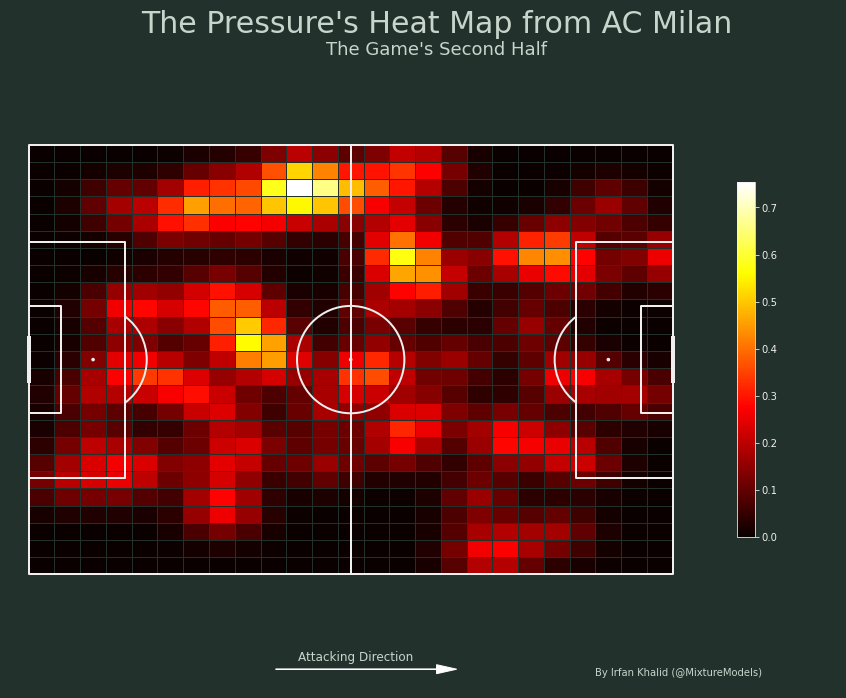

In [56]:
pitch = Pitch(pitch_type='statsbomb', line_zorder=2, 
              pitch_color='#22312b', line_color='#efefef')
fig, axs = pitch.grid(figheight=10, title_height=0.08, endnote_space=0, axis=False,
                    title_space=0, grid_height=0.82, endnote_height=0.05)
fig.set_facecolor('#22312b')

bin_statistic = pitch.bin_statistic(pressure.x, pressure.y, 
                                    statistic='count', bins=(25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)

pcm = pitch.heatmap(bin_statistic, ax=axs['pitch'], cmap='hot', edgecolors='#22312b')

cbar = fig.colorbar(pcm, ax=axs['pitch'], shrink=0.6)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')

axs['endnote'].text(0.8, 0.5, 'By Irfan Khalid (@MixtureModels)', color='#c7d5cc',
                   va='center', ha='center', fontsize=10)

axs['endnote'].text(0.4, 0.95, 'Attacking Direction', va='center', ha='center', color='#c7d5cc', fontsize=12)
axs['endnote'].arrow(0.3, 0.6, 0.2, 0, head_width=0.25, head_length=0.025, ec='w', fc='w')
axs['endnote'].set_xlim(0, 1)
axs['endnote'].set_ylim(0, 1)


axs['title'].text(0.5, 0.7, 'The Pressure\'s Heat Map from AC Milan', color='#c7d5cc',
                   va='center', ha='center', fontsize=30)
axs['title'].text(0.5, 0.25, 'The Game\'s Second Half', color='#c7d5cc',
                   va='center', ha='center', fontsize=18)
plt.show()

## Liverpool

In [57]:
pressure = second_half[df.type_name == 'Pressure']
pressure = pressure[['team_name', 'player_name', 'location']]
pressure = pressure[pressure.team_name == 'Liverpool']

pressure['x'] = pressure.location.apply(lambda x: x[0])
pressure['y'] = pressure.location.apply(lambda x: x[1])
pressure = pressure.drop('location', axis=1)

pressure.head()

,team_name,player_name,x,y
1850,Liverpool,Xabier Alonso Olano,52.5,74.4
1871,Liverpool,Xabier Alonso Olano,54.2,64.7
1876,Liverpool,Luis Javier García Sanz,63.2,71.4
1902,Liverpool,John Arne Semundseth Riise,45.6,21.8
1903,Liverpool,Dietmar Hamann,49.7,24.5


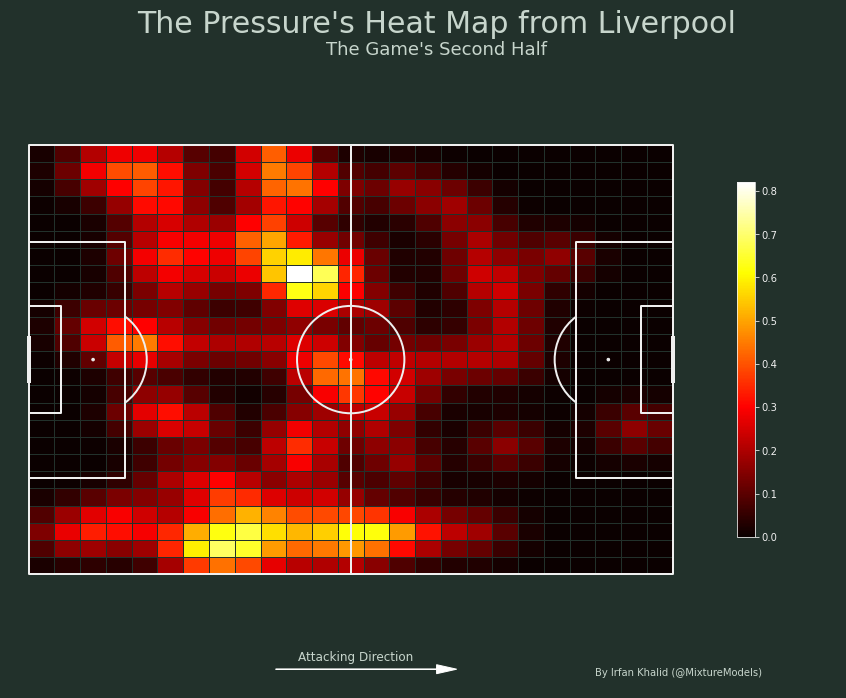

In [58]:
pitch = Pitch(pitch_type='statsbomb', line_zorder=2, 
              pitch_color='#22312b', line_color='#efefef')
fig, axs = pitch.grid(figheight=10, title_height=0.08, endnote_space=0, axis=False,
                    title_space=0, grid_height=0.82, endnote_height=0.05)
fig.set_facecolor('#22312b')

bin_statistic = pitch.bin_statistic(pressure.x, pressure.y, 
                                    statistic='count', bins=(25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)

pcm = pitch.heatmap(bin_statistic, ax=axs['pitch'], cmap='hot', edgecolors='#22312b')

cbar = fig.colorbar(pcm, ax=axs['pitch'], shrink=0.6)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')

axs['endnote'].text(0.8, 0.5, 'By Irfan Khalid (@MixtureModels)', color='#c7d5cc',
                   va='center', ha='center', fontsize=10)

axs['endnote'].text(0.4, 0.95, 'Attacking Direction', va='center', ha='center', color='#c7d5cc', fontsize=12)
axs['endnote'].arrow(0.3, 0.6, 0.2, 0, head_width=0.25, head_length=0.025, ec='w', fc='w')
axs['endnote'].set_xlim(0, 1)
axs['endnote'].set_ylim(0, 1)

axs['title'].text(0.5, 0.7, 'The Pressure\'s Heat Map from Liverpool', color='#c7d5cc',
                   va='center', ha='center', fontsize=30)
axs['title'].text(0.5, 0.25, 'The Game\'s Second Half', color='#c7d5cc',
                   va='center', ha='center', fontsize=18)
plt.show()